In [21]:
'''
@Filename: 
@Author: shifaqiang
@Email: 14061115@buaa.edu.cn
@Github: https://github.com/qianlicaody
@Date: 2019-05-12 19:57:38
@LastEditors: shifaqiang
@LastEditTime: 2019-05-12 22:43:59
@Software: Visual Studio Code
@Description: 
'''

import matplotlib.pyplot as plt
plt.style.use('../style/elegant.mplstyle')
%matplotlib inline
import numpy as np
from scipy import ndimage as ndi
from skimage import io,morphology

# 1-d signal

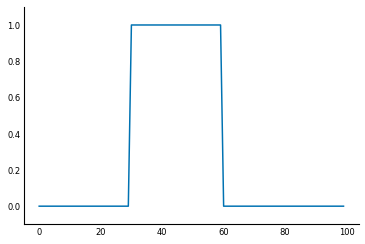

In [22]:
sig=np.zeros(100,dtype=np.float32)
sig[30:60]=1
_,ax=plt.subplots()
ax.plot(sig)
ax.set_ylim(-0.1,1.1);

# difference of signal

signal on at:30ms


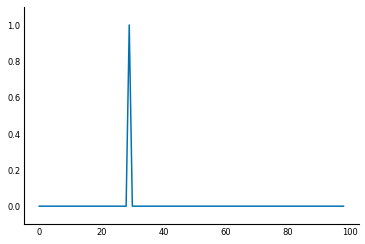

In [23]:
sigdelta=sig[1:]
sigdiff=sigdelta-sig[:-1]
sigon=np.clip(sigdiff,0,np.inf)
_,ax=plt.subplots()
ax.plot(sigon)
ax.set_ylim(-0.1,1.1);
print('signal on at:{}ms'.format(1+np.flatnonzero(sigon)[0]))

In [24]:
sig

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

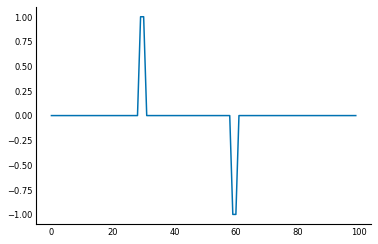

In [25]:
diff_filter=np.array([1,0,-1])
dsig=ndi.convolve(sig,diff_filter)
plt.plot(dsig);

# signal with noise

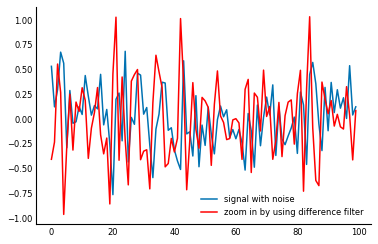

In [26]:
np.random.seed(0)
sig=np.random.normal(0,0.3,size=sig.shape)
plt.plot(sig,label='signal with noise');
plt.plot(ndi.convolve(sig,diff_filter),color='r',label='zoom in by using difference filter');
plt.legend();

# gaussian smooth

In [27]:
def gausssian_kernel(size,sigma):
    positions=np.arange(size)-size//2
    kernel_raw=np.exp(-positions**2/(2*sigma**2))
    kernel_normalized=kernel_raw/np.sum(kernel_raw)
    return kernel_normalized

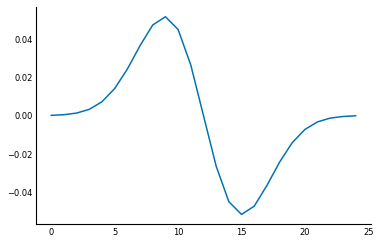

In [28]:
smooth_diff=ndi.convolve(gausssian_kernel(25,3),diff_filter)
plt.plot(smooth_diff);
# 高斯平滑后的差分滤波器

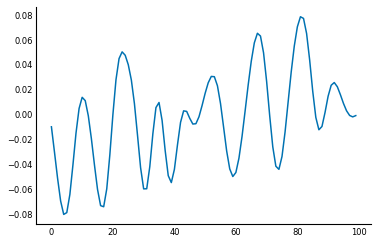

In [29]:
sdsig=ndi.convolve(sig,smooth_diff)
plt.plot(sdsig);

# 2-d convolution

/usr/local/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1428: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


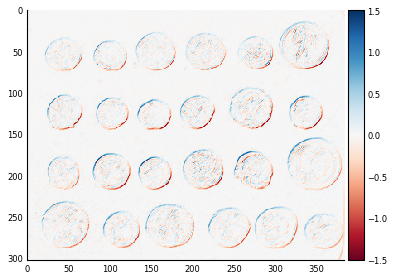

In [31]:
coins=io.imread('../data/coins.png')
coins=coins.astype(float)/255
diff_filter_2d=np.array([[0,1,0],[1,0,-1],[0,-1,0]])
coins_edge=ndi.convolve(coins,diff_filter_2d)
io.imshow(coins_edge);

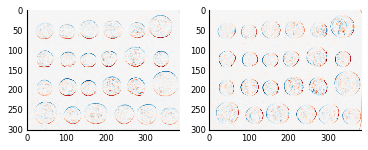

In [32]:
def reduce_xaxis(ax,factor):
    _,ax=plt.subplots()
    plt.setp(ax.xaxis.get_ticklabels(),visible=False)
    for label in ax.xaxis.get_ticklabels()[::factor]:
        label.set_visible(True)
hsobel=np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
vsobel=hsobel.T
coins_h=ndi.convolve(coins,hsobel)
coins_v=ndi.convolve(coins,vsobel)
_,axes=plt.subplots(1,2)
axes[0].imshow(coins_h,cmap=plt.cm.RdBu)
axes[1].imshow(coins_v,cmap=plt.cm.RdBu)

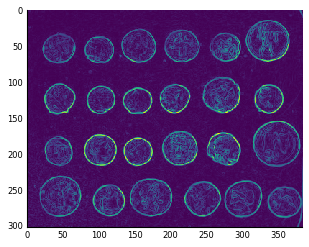

In [33]:
coins_sobel=np.sqrt(coins_h**2+coins_v**2)
plt.imshow(coins_sobel,cmap='viridis')